In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [4]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/YueminLi/Airbnb_NYC_2019/master/AB_NYC_2019.csv'
df = pd.read_csv(url)


In [5]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [6]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# Drop rows with missing values or fill them with appropriate values
df.dropna(inplace=True)  # Simplest approach, or you can use df.fillna() for imputation


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


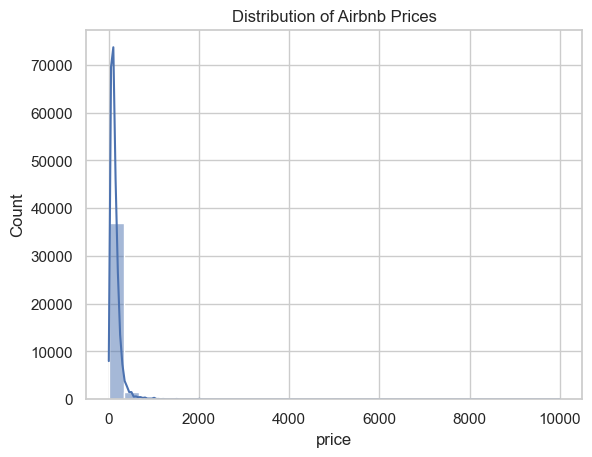

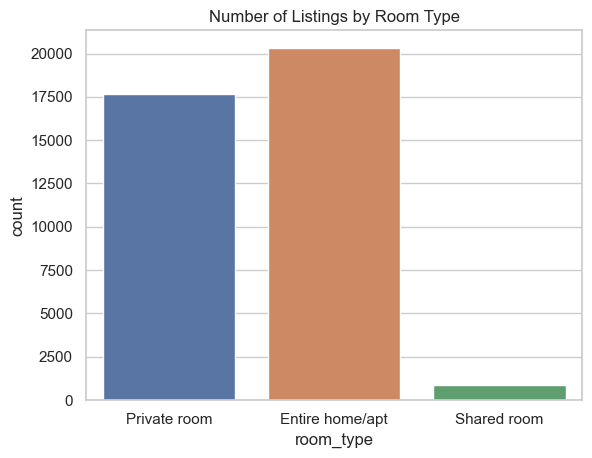

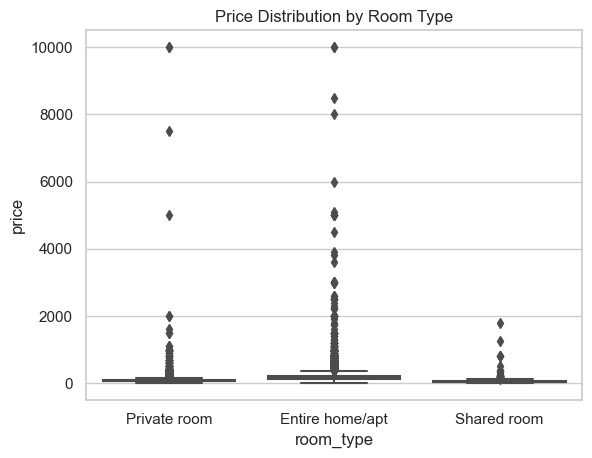

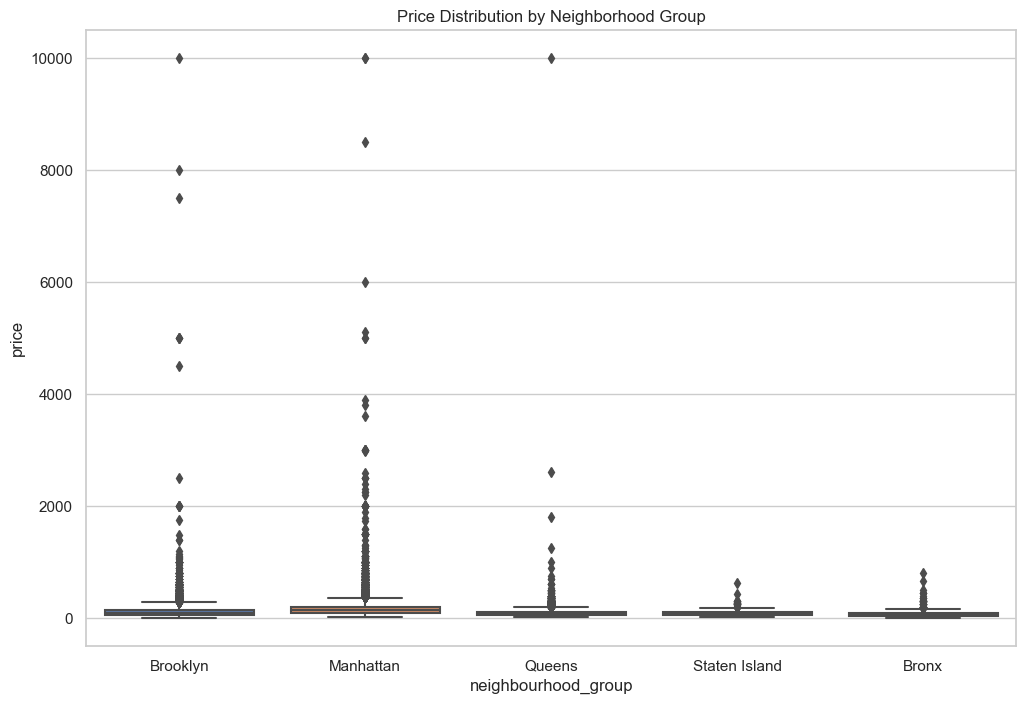

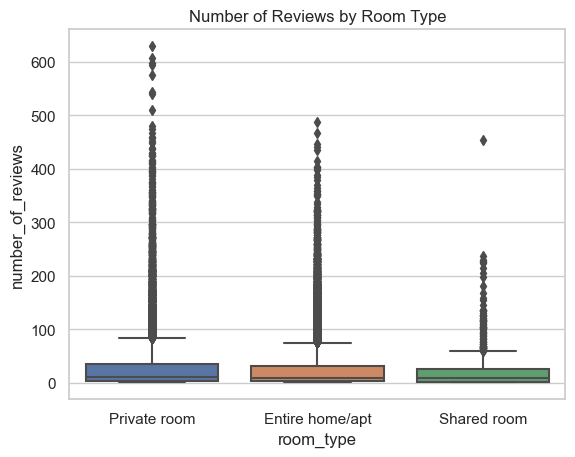

In [7]:
# Step 5: Data Visualization
# Distribution of prices
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Airbnb Prices')
plt.show()

# Number of listings by room type
sns.countplot(x='room_type', data=df)
plt.title('Number of Listings by Room Type')
plt.show()

# Prices by room type
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.show()

# Average price by neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighborhood Group')
plt.show()

# Number of reviews by room type
sns.boxplot(x='room_type', y='number_of_reviews', data=df)
plt.title('Number of Reviews by Room Type')
plt.show()


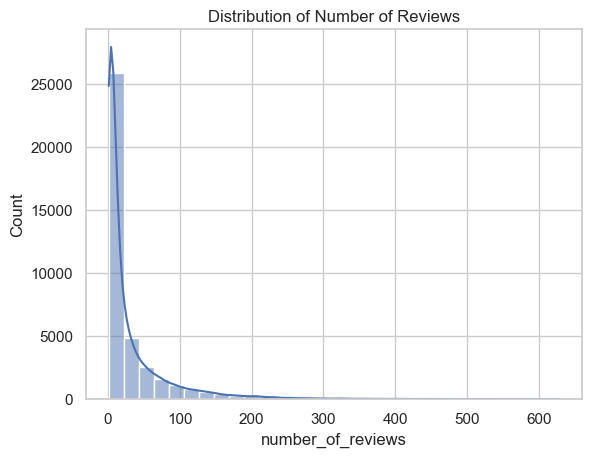

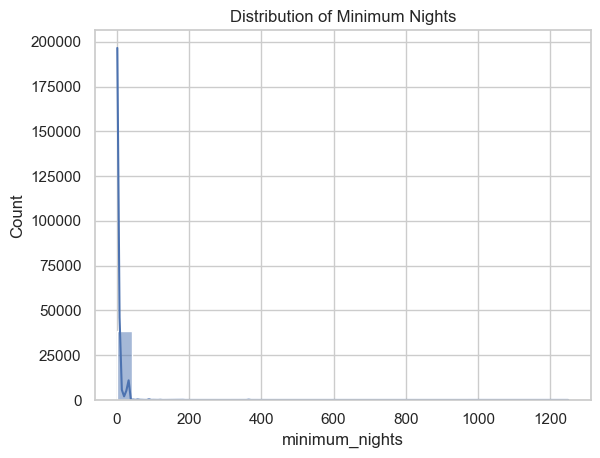

In [8]:
# Step 6: Univariate Analysis
# Distribution of number of reviews
sns.histplot(df['number_of_reviews'], kde=True, bins=30)
plt.title('Distribution of Number of Reviews')
plt.show()

# Distribution of minimum nights
sns.histplot(df['minimum_nights'], kde=True, bins=30)
plt.title('Distribution of Minimum Nights')
plt.show()


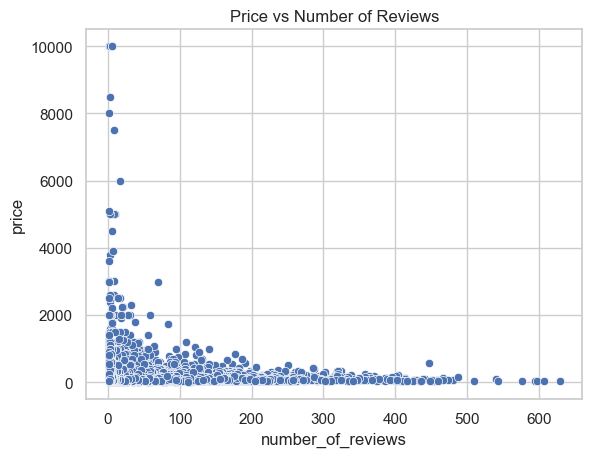

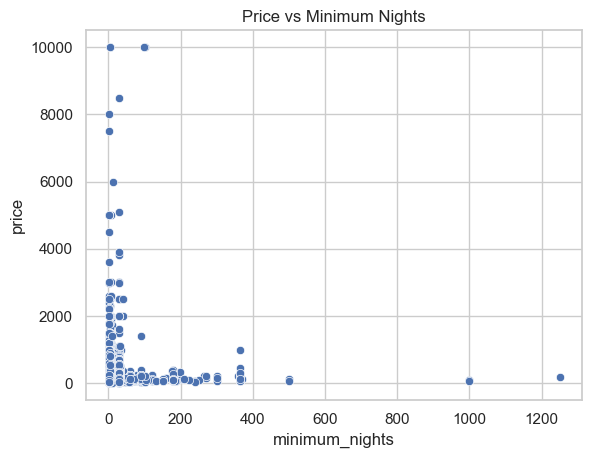

In [9]:
# Step 7: Bivariate Analysis
# Price vs Number of Reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs Number of Reviews')
plt.show()

# Price vs Minimum Nights
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title('Price vs Minimum Nights')
plt.show()


C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


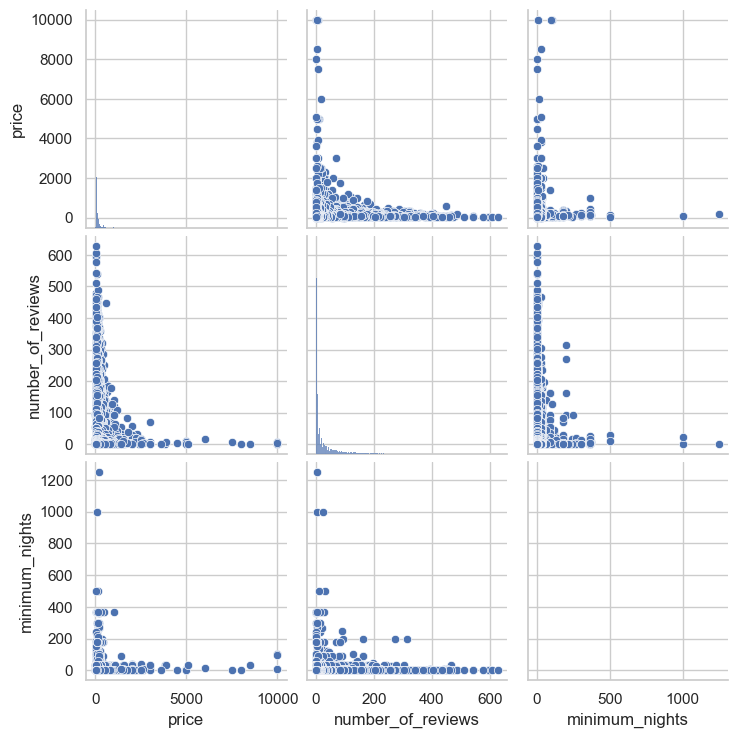

In [10]:
# Step 8: Multivariate Analysis
# Pair plot for numerical features
sns.pairplot(df[['price', 'number_of_reviews', 'minimum_nights']])
plt.show()


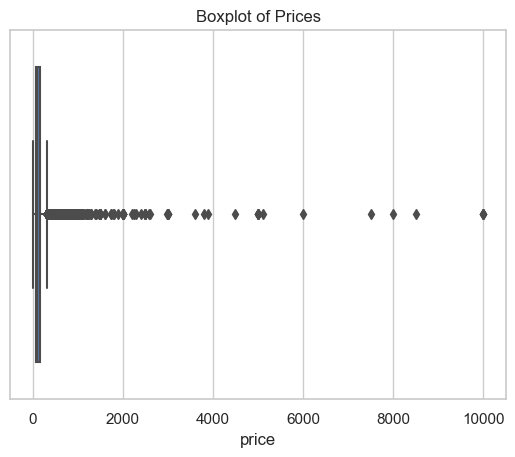

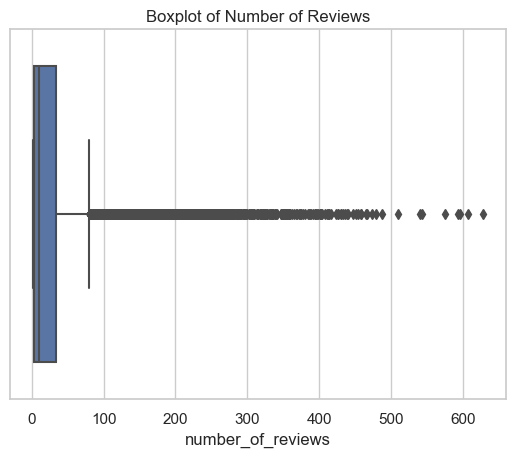

In [11]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in prices
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.show()

# Removing outliers from prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in number of reviews
sns.boxplot(x=df['number_of_reviews'])
plt.title('Boxplot of Number of Reviews')
plt.show()

# Removing outliers from number of reviews
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['number_of_reviews'] < (Q1 - 1.5 * IQR)) | (df['number_of_reviews'] > (Q3 + 1.5 * IQR)))]


In [12]:
# Step 10: Feature Engineering
# Create a feature for price category
df['price_category'] = pd.cut(df['price'], bins=[0, 100, 200, 300, 400, 500, np.inf], labels=['<$100', '$100-$200', '$200-$300', '$300-$400', '$400-$500', '>$500'])

# Create a feature for review category
df['review_category'] = pd.cut(df['number_of_reviews'], bins=[0, 10, 50, 100, 200, np.inf], labels=['0-10', '10-50', '50-100', '100-200', '200+'])


In [13]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Distribution of prices
price_dist = df['price'].describe()
print(f"Price Distribution:\n{price_dist}")

# Distribution of number of reviews
review_dist = df['number_of_reviews'].describe()
print(f"Number of Reviews Distribution:\n{review_dist}")

# Average price by room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean()
print(f"Average Price by Room Type:\n{avg_price_by_room_type}")

# Average number of reviews by room type
avg_reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].mean()
print(f"Average Number of Reviews by Room Type:\n{avg_reviews_by_room_type}")

# Average price by neighborhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean()
print(f"Average Price by Neighborhood Group:\n{avg_price_by_neighbourhood}")


Key Insights:
Price Distribution:
count    32767.000000
mean       117.550676
std         65.686831
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        321.000000
Name: price, dtype: float64
Number of Reviews Distribution:
count    32767.000000
mean        15.811945
std         18.813718
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max         80.000000
Name: number_of_reviews, dtype: float64
Average Price by Room Type:
room_type
Entire home/apt    158.923353
Private room        77.038133
Shared room         55.792793
Name: price, dtype: float64
Average Number of Reviews by Room Type:
room_type
Entire home/apt    15.615122
Private room       16.092123
Shared room        14.352638
Name: number_of_reviews, dtype: float64
Average Price by Neighborhood Group:
neighbourhood_group
Bronx             74.721932
Brooklyn         105.049157
Manhattan        142.017734
Queens            88.155416
Staten Islan